In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [4]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(f"Animals in project {tv_projects[1]}: {animals}")
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_cluster_data(
        project_name=tv_projects[1],
        file_path="sessions/{}/{}.csv".format(mouse, mouse),
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

Animals in project visual_and_COT_data: ['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010']
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 301,022,513  speedup is 3,010,225.13
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 240,284,208  speedup is 2,402,842.08
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 284,369,538  speedup is 2,843,695.38
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 219,240,689  speedup is 2,192,406.89
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 203,488,253  speedup is 2,034,882.53
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 219,302,870  speedup is 2,193,028.70
receiving incremental file list

sent 27 bytes  receive

In [5]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_818479/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [6]:
# select only the visual easy task
df2afc = df[df['current_training_stage'] == 'TwoAFC_visual_easy']

In [7]:
df_subject_list = []
for mouse in animals:
    df_mouse = df2afc[df2afc['subject'] == mouse]
    df_session_list = []
    for session in df_mouse['session'].unique():
        df_session = df_mouse[df_mouse['session'] == session].copy()
        session_start_time = df_session['TRIAL_START'].iloc[0]
        df_session['time_from_start'] = df_session['TRIAL_START'] - session_start_time
        df_session_list.append(df_session)
    # calculate the performance
    df_mouse = pd.concat(df_session_list, ignore_index=True)
    df_mouse = dft.get_performance_through_trials(df_mouse, window=25)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

In [8]:
# select only the trials with a performance above 0.75
# TODO: fix this so that this applies to the entire session
df2afc = df2afc[df2afc['performance_w'] > 75]

## ITI analysis

In [9]:
df2afc = dft.add_inter_trial_interval_column_to_df(df2afc)

In [10]:
# do it with trial duration
df2afc = dft.add_trial_duration_column_to_df(df2afc)

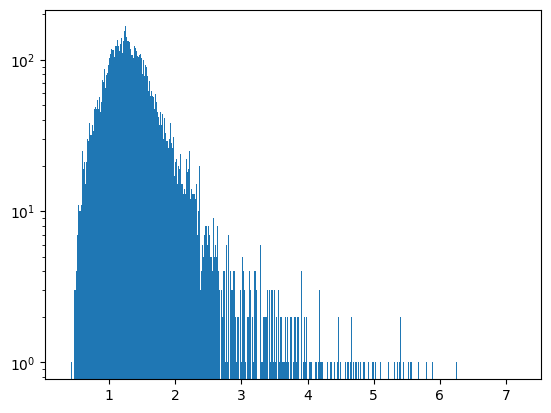

In [10]:
plt.hist(np.log(df2afc['trial_duration']), bins=10000)
# plt.xlim(0, 15)
plt.yscale('log')
plt.show()

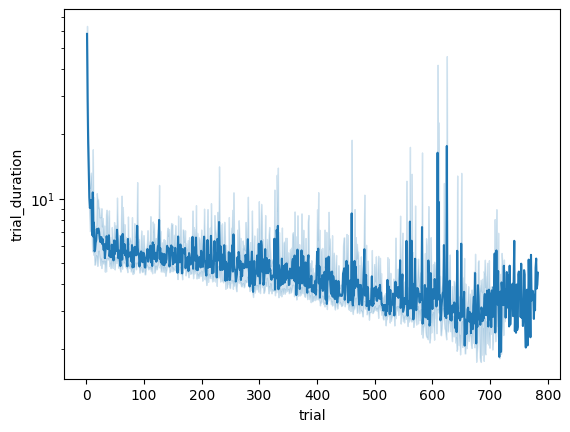

In [11]:
# iti vs trial number
sns.lineplot(data=df2afc, x='trial', y='trial_duration')
plt.yscale('log')
plt.show()

In [10]:
# why does iti decrease with trial number? number of pokes in port2?
df2afc["port2_holds"] = df2afc.apply(lambda row: utils.get_trial_port_hold(row, 2), axis=1)
df2afc["port2_holds_number"] = df2afc.port2_holds.apply(len)

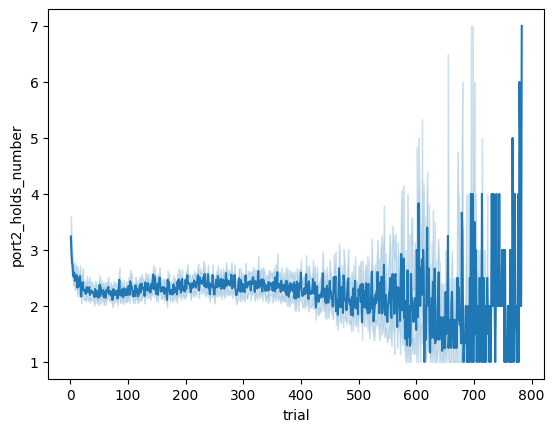

In [11]:
sns.lineplot(data=df2afc, x='trial', y='port2_holds_number')
plt.show()

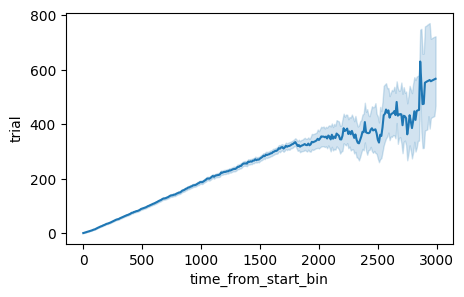

In [11]:
# engagement over the session
df2afc["time_from_start_bin"] = df2afc["time_from_start"] // 10 * 10
df2afc_cumulative = df2afc.groupby(["time_from_start_bin", "date"])["trial"].max().reset_index()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
sns.lineplot(data=df2afc_cumulative, x='time_from_start_bin', y='trial', ax=axs)
plt.show()

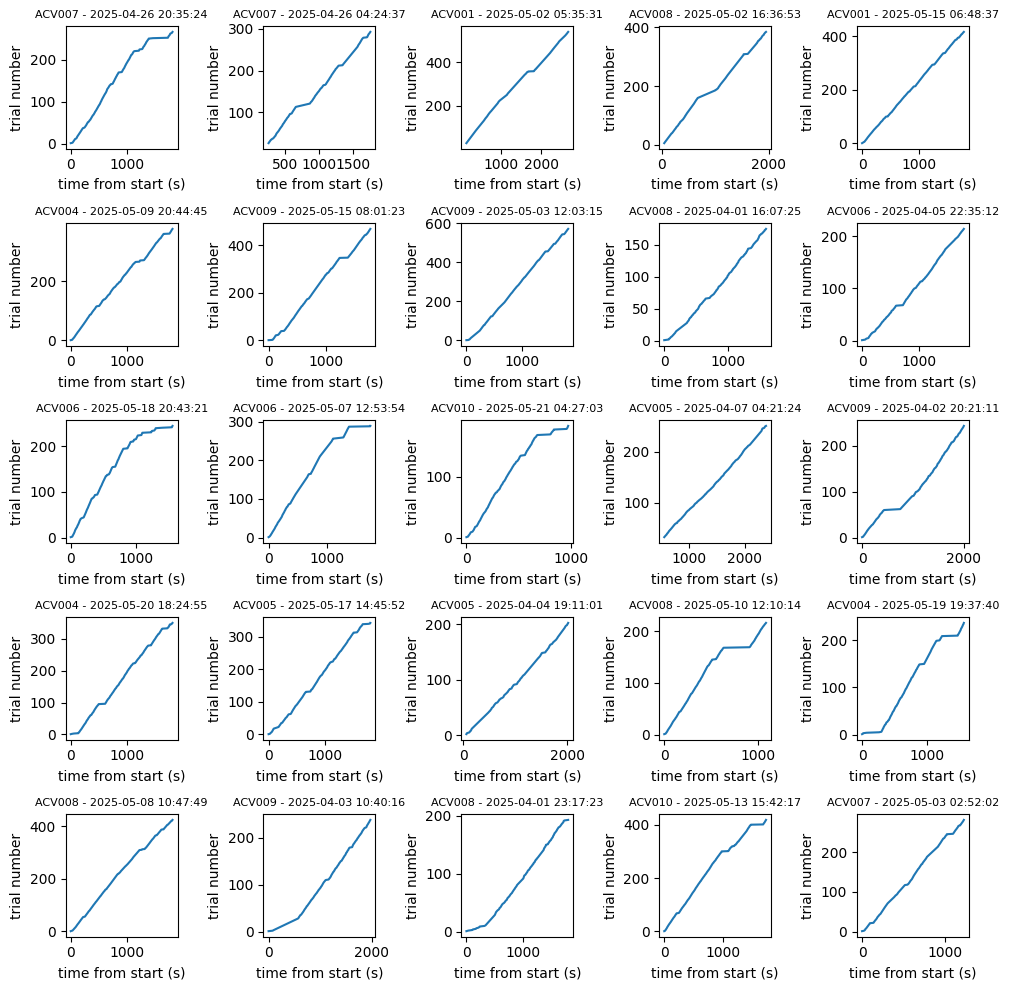

In [12]:
# select random sessions to plot this, with a minimum of 100 trials
df2afc_sessions = df2afc.groupby(['subject', 'session']).filter(lambda x: len(x) > 100)
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
axs = axs.flatten()
for i in range(len(axs)):
    # select a random subject and session
    subject = np.random.choice(df2afc_sessions['subject'].unique())
    session = np.random.choice(df2afc_sessions[df2afc_sessions['subject'] == subject]['session'].unique())
    session_data = df2afc_sessions[(df2afc_sessions['subject'] == subject) & (df2afc_sessions['session'] == session)]

    sns.lineplot(data=session_data, x='time_from_start', y='trial', ax=axs[i])
    axs[i].set_title(f"{subject} - {session_data['date'].iloc[0]}", fontsize=8)
    axs[i].set_xlabel('time from start (s)')
    axs[i].set_ylabel('trial number')

plt.tight_layout()
plt.show()

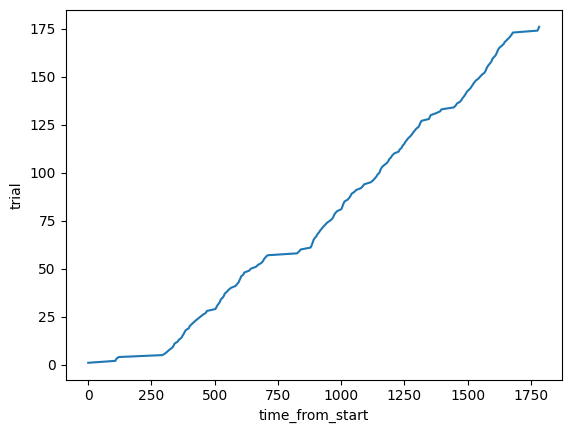

In [13]:
mouse = "ACV008"
date = "2025-04-04 12:04:52"

# select the data for the specific mouse and date
df_mouse = df2afc[(df2afc['subject'] == mouse) & (df2afc['date'] == date)]

sns.lineplot(data=df_mouse, x='time_from_start', y='trial')
plt.show()

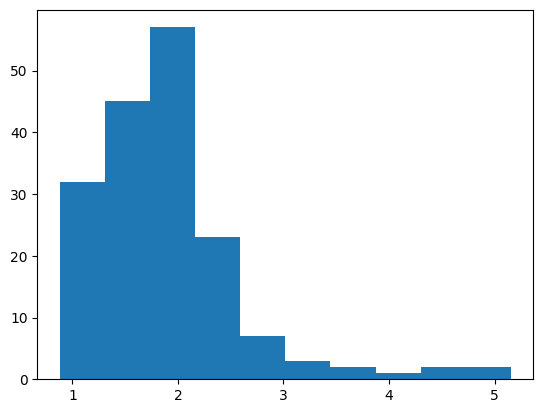

In [14]:
plt.hist(np.log(df_mouse['trial_duration']))
# plt.yscale('log')
plt.show()

In [15]:
# get the median and std of the log of the inter_trial_interval
df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
median_iti_log = df_mouse['td_log'].median()
std_iti_log = df_mouse['td_log'].std()

# classify trials as engaged or not engaged depending on the iti_log
df_mouse['engaged'] = df_mouse['td_log'] < (median_iti_log + 2 * std_iti_log)

/tmp/ipykernel_818479/2155993529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_818479/2155993529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['engaged'] = df_mouse['td_log'] < (median_iti_log + 2 * std_iti_log)


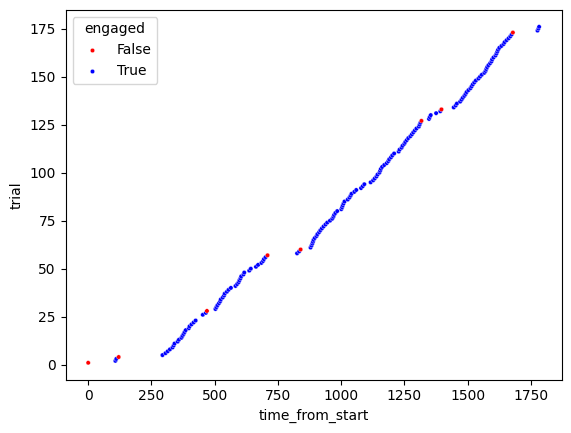

In [16]:
sns.scatterplot(data=df_mouse, x='time_from_start', y='trial', hue='engaged', palette={True: 'blue', False: 'red'}, s=10)
plt.show()

In [ ]:
# add trial duration
# df_mouse = dft.add_trial_duration_column_to_df(df_mouse)

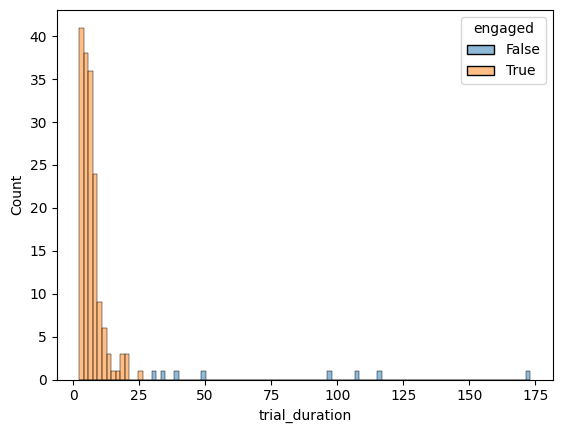

In [16]:
sns.histplot(data=df_mouse, x='trial_duration', bins=100, hue='engaged')
plt.show()


In [ ]:
# divide the session time into:
# - engaged
# - disengaged
# - time to complete the first trial
# - time from last trial to leave the box

# the end of the session is stored in a different dataset: session_summary

In [17]:
# retrive the session summary data
# download the session data
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="sessions_summary.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)


receiving incremental file list
sessions_summary.csv

sent 15,031 bytes  received 12,039 bytes  10,828.00 bytes/sec
total size is 6,605,462  speedup is 244.01


True

In [18]:
sessions_summary_df = pd.read_csv(local_path / Path('sessions_summary.csv'), sep=';')

In [19]:
from datetime import datetime

def get_session_box_usage_complete(session_df: pd.DataFrame, sessions_summary_df: pd.DataFrame) -> dict:

    if session_df.date.unique().size != 1:
        raise ValueError("Session dataframe must contain data for a single date.")

    #TODO: do the column checker

    date = session_df.date.unique()[0]
    date_timestamp = datetime.strptime(date, "%Y-%m-%d %H:%M:%S").timestamp() + 3600
    session_duration = sessions_summary_df[sessions_summary_df['date'] == date].duration.values[0]
    time_to_complete_first_trial = session_df.iloc[0].trial_duration
    start_of_first_trial = session_df.iloc[0].TRIAL_START
    time_to_complete_last_trial = session_df.iloc[-1].TRIAL_END - start_of_first_trial
    time_to_exit_box = session_duration - time_to_complete_last_trial

    session_duration_as_sum_of_trials = session_df['trial_duration'].sum()

    session_duration_as_dif_last_from_first = session_df['TRIAL_END'].iloc[-1] - session_df['TRIAL_START'].iloc[0]

    # add the time of engagement and disengagement, removing the first trial
    session_df = session_df.iloc[1:]  # remove the first trial for engagement calculation
    engaged_time = session_df[session_df['engaged']]['trial_duration'].sum()
    disengaged_time = session_df[~session_df['engaged']]['trial_duration'].sum()

    start_time_dif = start_of_first_trial - date_timestamp

    return {
        "date": date,
        "time_to_complete_first_trial": time_to_complete_first_trial,
        "time_to_exit_box": time_to_exit_box,
        "engaged_time": engaged_time,
        "disengaged_time": disengaged_time,
        "session_duration": session_duration,
        "all_adds_up_to": (
            time_to_complete_first_trial +
            time_to_exit_box +
            engaged_time +
            disengaged_time
        ),
        "start_time_dif": start_time_dif,
        "session_duration_as_sum_of_trials": session_duration_as_sum_of_trials,
        "session_duration_as_dif_last_from_first": session_duration_as_dif_last_from_first,

    }

get_session_box_usage_complete(df_mouse, sessions_summary_df)

{'date': '2025-04-04 12:04:52',
 'time_to_complete_first_trial': 107.34159994125366,
 'time_to_exit_box': 12.378149175644012,
 'engaged_time': 1123.5817987918854,
 'disengaged_time': 538.4500997066498,
 'session_duration': 1800.7125,
 'all_adds_up_to': 1781.7516476154328,
 'start_time_dif': 0.8536710739135742,
 'session_duration_as_sum_of_trials': 1769.3734984397888,
 'session_duration_as_dif_last_from_first': 1788.334350824356}

In [22]:
def test_session_delta(session_df: pd.DataFrame, sessions_summary_df: pd.DataFrame) -> float:

    if session_df.date.unique().size != 1:
        raise ValueError("Session dataframe must contain data for a single date.")

    #TODO: do the column checker

    date = session_df.date.unique()[0]
    date_timestamp = datetime.strptime(date, "%Y-%m-%d %H:%M:%S").timestamp()
    last_trial_end = session_df['TRIAL_END'].iloc[-1]
    session_duration = last_trial_end - date_timestamp
    actual_session_duration = sessions_summary_df[sessions_summary_df['date'] == date].duration.values[0]

    return session_duration - actual_session_duration

list_of_deltas = []
for date in df2afc['date'].unique():
    df_mouse = df2afc[df2afc['date'] == date]
    delta = test_session_delta(df_mouse, sessions_summary_df)
    list_of_deltas.append(delta)

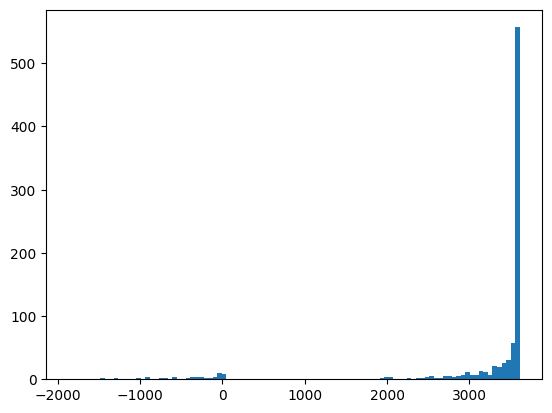

In [23]:
plt.hist(list_of_deltas, bins=100)
plt.show()

In [20]:
sessions_summary_df['date'] = pd.to_datetime(sessions_summary_df['date'], format='%Y-%m-%d %H:%M:%S')

In [21]:
# the session duration needs to be computed from the events, not from the sessions_summary_df
# load all the past events data
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="old_events",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="events.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)

receiving incremental file list
old_events/

sent 43 bytes  received 230 bytes  182.00 bytes/sec
total size is 12,879,798  speedup is 47,178.75
receiving incremental file list
events.csv

sent 7,357 bytes  received 32,716 bytes  11,449.43 bytes/sec
total size is 1,810,568  speedup is 45.18


True

In [22]:
events_df = utils.load_all_events(project_name=tv_projects[1])

In [23]:
def find_next_end_task_time_in_events(events_df: pd.DataFrame, date: str, subject: str) -> float:
    """
    Find the end task time in the events dataframe for a given date.
    """
    # filter events
    filtered_events = events_df[events_df['description'] == "The subject has returned home."]
    
    # get the first event after the given date
    end_event = filtered_events[filtered_events['date'] > date]
    # if there are no events after the given date, return None
    if end_event.empty:
        print(f"No end event found after date {date}.")
        return "No date", None
    # calculate the duration from the given date to the end event
    duration = (pd.to_datetime(end_event['date'].iloc[0]) - pd.to_datetime(date)).total_seconds()
    # get the subject as well
    subject_of_event = end_event['subject'].iloc[0]

    if subject_of_event != subject:
        print(f"Subject mismatch for {date}: expected {subject}, found {subject_of_event}.")
        return None, "Different subject"

    # return the date of the first event
    return end_event['date'].iloc[0], duration

In [24]:
# find the end events for all the dates in df2afc using apply method
session_duration_df = df2afc.groupby('date')['subject'].first().reset_index(drop=False)
session_duration_df["end_of_session_result_search"]= session_duration_df.apply(lambda x: find_next_end_task_time_in_events(events_df, x['date'], x['subject']), axis=1)

Subject mismatch for 2025-04-02 08:44:36: expected ACV001, found ACV003.


In [25]:
session_duration_df["end_of_task"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[0])
session_duration_df["duration"] = session_duration_df["end_of_session_result_search"].apply(lambda x: x[1])
# drop end_of_session_result_search
session_duration_df.drop(columns=["end_of_session_result_search"], inplace=True)

<Axes: xlabel='duration', ylabel='Count'>

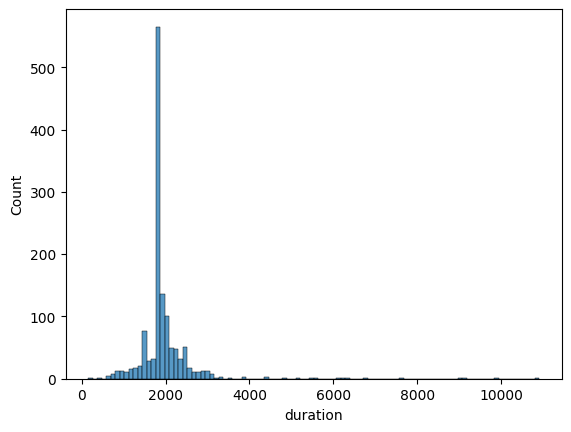

In [130]:
sns.histplot(data=end_events_df, x='duration', bins=100)

In [26]:
# replace any None entry by a nan
session_duration_df.replace({None: np.nan}, inplace=True)
# drop nans
session_duration_df.dropna(inplace=True)

In [27]:
engagement_sd_criteria = 2
df2afc = df[df['current_training_stage'] == 'TwoAFC_visual_easy']
df2afc = dft.add_trial_duration_column_to_df(df2afc)
# df2afc = dft.add_inter_trial_interval_column_to_df(df2afc)
td_vals_dict = {
    'subject': [],
    'median_td_log': [],
    'std_td_log': [],
}
for subject in df2afc['subject'].unique():
    df_mouse = df2afc[df2afc['subject'] == subject]
    # get the median and std of the log of the trial_duration
    df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
    median_td_log = df_mouse['td_log'].median()
    std_td_log = df_mouse['td_log'].std()

    # store the median and std in the td_vals_dict
    td_vals_dict['subject'].append(subject)
    td_vals_dict['median_td_log'].append(median_td_log)
    td_vals_dict['std_td_log'].append(std_td_log)

    # classify trials as engaged or not engaged depending on the td_log
    df_mouse['engaged'] = df_mouse['td_log'] < (median_td_log + engagement_sd_criteria * std_td_log)

    df2afc.loc[df2afc['subject'] == subject, 'engaged'] = df_mouse['engaged']

/tmp/ipykernel_818479/2050104408.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_818479/2050104408.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['engaged'] = df_mouse['td_log'] < (median_td_log + engagement_sd_criteria * std_td_log)
/tmp/ipykernel_818479/2050104408.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [28]:
td_vals_df = pd.DataFrame(td_vals_dict)

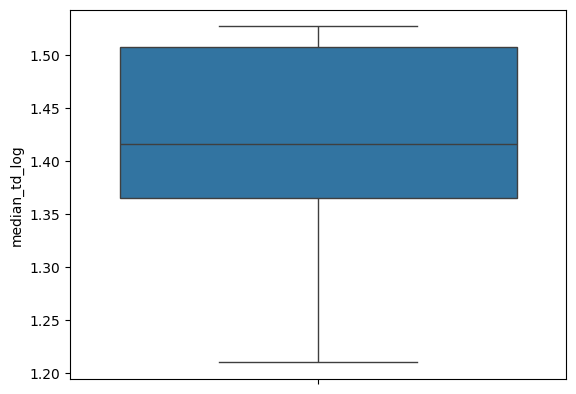

In [29]:
sns.boxplot(data=td_vals_df, y='median_td_log')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_818479/309581297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_818479/309581297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_818479/309581297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

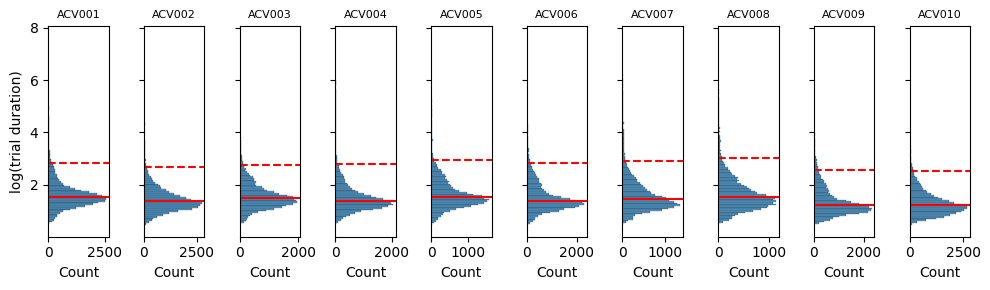

In [30]:
fig, axs = plt.subplots(ncols=len(df2afc.subject.unique()), nrows=1, figsize=(10, 3), sharey=True)
axs = axs.ravel()
for i, subject in enumerate(df2afc.subject.unique()):
    df_mouse = df2afc[df2afc['subject'] == subject]
    df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
    sns.histplot(data=df_mouse, y='td_log', ax=axs[i], bins=100)
    # horizontal line at the median
    median_td_log = df_mouse['td_log'].median()
    std_td_log = df_mouse['td_log'].std()
    axs[i].axhline(median_td_log, color='red', linestyle='-')
    axs[i].axhline(median_td_log + engagement_sd_criteria * std_td_log, color='red', linestyle='--')
    # axs[i].axhline(median_td_log - engagement_sd_criteria * std_td_log, color='red', linestyle='--')
    axs[i].set_title(subject, fontsize=8)
    axs[i].set_ylabel('log(trial duration)')
plt.tight_layout()
plt.show()

In [31]:
# TODO: check these differences per mouse between day and night
def is_day_session(date: str) -> bool:
    """
    Check if the session is a day session based on the date.
    """
    hour = int(date.split(" ")[1].split(":")[0])
    return 8 <= hour < 19  # Daytime is considered from 8 AM to 8 PM

In [32]:
df2afc['day_session'] = df2afc['date'].apply(is_day_session)

/tmp/ipykernel_818479/426774236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_818479/426774236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
/tmp/ipykernel_818479/426774236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

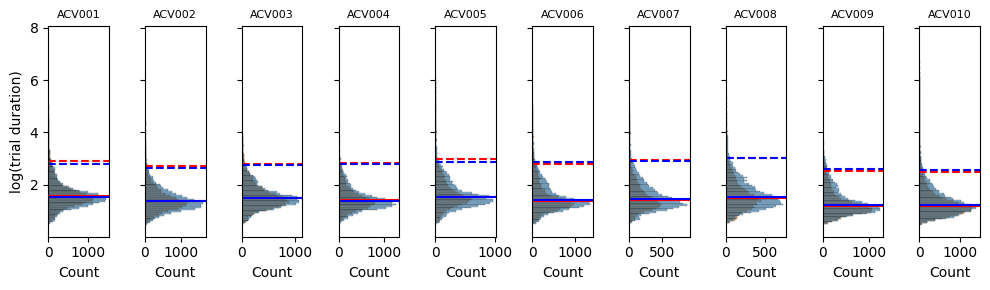

In [33]:
fig, axs = plt.subplots(ncols=len(df2afc.subject.unique()), nrows=1, figsize=(10, 3), sharey=True)
axs = axs.ravel()
for i, subject in enumerate(df2afc.subject.unique()):
    df_mouse = df2afc[df2afc['subject'] == subject]
    df_mouse['td_log'] = np.log(df_mouse['trial_duration'])
    sns.histplot(data=df_mouse, y='td_log', hue='day_session', ax=axs[i], bins=100)
    # horizontal line at the median
    median_td_log_day = df_mouse[df_mouse['day_session']]['td_log'].median()
    median_td_log_night = df_mouse[~df_mouse['day_session']]['td_log'].median()
    std_td_log_day = df_mouse[df_mouse['day_session']]['td_log'].std()
    std_td_log_night = df_mouse[~df_mouse['day_session']]['td_log'].std()
    axs[i].axhline(median_td_log_day, color='red', linestyle='-')
    axs[i].axhline(median_td_log_day + engagement_sd_criteria * std_td_log_day, color='red', linestyle='--')
    axs[i].axhline(median_td_log_night, color='blue', linestyle='-')
    axs[i].axhline(median_td_log_night + engagement_sd_criteria * std_td_log_night, color='blue', linestyle='--')
    axs[i].set_title(subject, fontsize=8)
    axs[i].set_ylabel('log(trial duration)')
    # remove legend
    axs[i].get_legend().remove()

plt.tight_layout()
plt.show()

In [34]:
def get_session_box_usage(session_df: pd.DataFrame, session_duration_df: pd.DataFrame) -> pd.DataFrame:

    if session_df.date.unique().size != 1:
        raise ValueError("Session dataframe must contain data for a single date.")

    #TODO: do the column checker

    date = session_df.date.unique()[0]
    subject = session_df.subject.unique()[0]
    session_duration = session_duration_df[session_duration_df['date'] == date].duration.values[0]
    time_to_complete_first_trial = session_df.iloc[0].trial_duration
    start_of_first_trial = session_df.iloc[0].TRIAL_START
    last_trial_completed_time = session_df.iloc[-1].TRIAL_END - start_of_first_trial
    time_to_exit_box = session_duration - last_trial_completed_time
    # add accuracy as well
    accuracy = session_df['correct'].mean() * 100

    # add the time of engagement and disengagement, removing the first trial
    session_df = session_df.iloc[1:]  # remove the first trial for engagement calculation
    engaged_time = session_df[session_df['engaged'] == True]['trial_duration'].sum()
    disengaged_time = session_df[session_df['engaged'] == False]['trial_duration'].sum()

    unaccounted_time = session_duration - (time_to_complete_first_trial + time_to_exit_box +
                                           engaged_time + disengaged_time)
    
    total_session_time = time_to_complete_first_trial + time_to_exit_box + engaged_time + disengaged_time + unaccounted_time

    return pd.DataFrame({
        "date": [date] * 5,
        "subject": [subject] * 5,
        "time_type": [
            "time_to_complete_first_trial",
            "time_to_exit_box",
            "engaged_time",
            "disengaged_time",
            "unaccounted_time"
        ],
        "absolute_time": [
            time_to_complete_first_trial,
            time_to_exit_box,
            engaged_time,
            disengaged_time,
            unaccounted_time
        ],
        "percentage_of_time": [
            time_to_complete_first_trial / total_session_time * 100,
            time_to_exit_box / total_session_time * 100,
            engaged_time / total_session_time * 100,
            disengaged_time / total_session_time * 100,
            unaccounted_time / total_session_time * 100
        ],
        "accuracy": [accuracy] * 5,
    })

gsbu_dfs = []
for date in df2afc['date'].unique():
    if date not in session_duration_df['date'].values:
        print(f"Date {date} not found in session_duration_df. Skipping.")
        continue
    df_session = df2afc[df2afc['date'] == date]
    gsbu_dfs.append(get_session_box_usage(df_session, session_duration_df= session_duration_df))
gsbu_df = pd.concat(gsbu_dfs, ignore_index=True)

Date 2025-03-16 00:29:14 not found in session_duration_df. Skipping.
Date 2025-03-16 20:11:41 not found in session_duration_df. Skipping.
Date 2025-03-17 08:58:16 not found in session_duration_df. Skipping.
Date 2025-03-17 17:52:10 not found in session_duration_df. Skipping.
Date 2025-03-18 00:42:55 not found in session_duration_df. Skipping.
Date 2025-03-18 11:29:34 not found in session_duration_df. Skipping.
Date 2025-03-19 02:21:51 not found in session_duration_df. Skipping.
Date 2025-03-19 14:29:56 not found in session_duration_df. Skipping.
Date 2025-03-19 23:55:14 not found in session_duration_df. Skipping.
Date 2025-03-20 09:38:08 not found in session_duration_df. Skipping.
Date 2025-03-20 18:31:17 not found in session_duration_df. Skipping.
Date 2025-03-21 03:37:21 not found in session_duration_df. Skipping.
Date 2025-03-21 09:57:58 not found in session_duration_df. Skipping.
Date 2025-03-21 15:37:02 not found in session_duration_df. Skipping.
Date 2025-03-22 01:46:22 not found

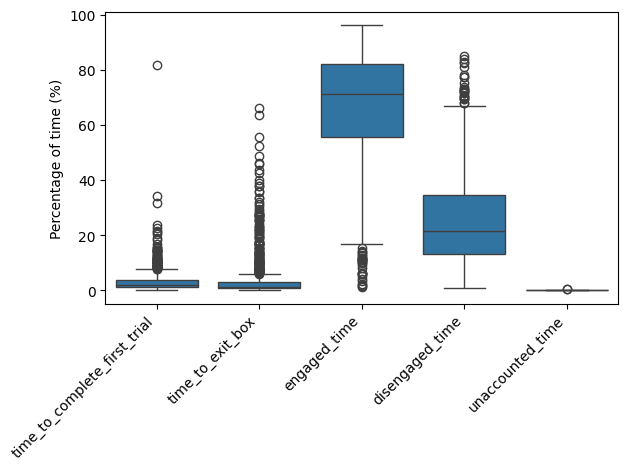

In [35]:
sns.boxplot(data=gsbu_df, x='time_type', y='percentage_of_time')
plt.xticks(rotation=45)
# remove legend
plt.legend([],[], frameon=False)
# plt.yscale('log')
plt.ylabel('Percentage of time (%)')
# align x ticks to the end
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.tight_layout()
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_engagement_boxplot.pdf', bbox_inches='tight', transparent=True)

In [ ]:
gsbu_df[(gsbu_df['percentage_of_time'] > 0) | (gsbu_df['time_type'] == "time_to_exit_box")]

In [47]:
# why are values higher than 100 or lower than 0?
gsbu_df[(gsbu_df['percentage_of_time'] > 100) | (gsbu_df['percentage_of_time'] < 0)]

,date,subject,time_type,absolute_time,percentage_of_time,accuracy,year_month_day,accuracy_bins,is_day_session
5806,2025-03-17 23:46:19,ACV010,time_to_exit_box,-9.210368,-0.514039,43.243243,2025-03-17,40.0,False
4643,2025-03-17 21:11:50,ACV008,disengaged_time,1701.155800,118.047137,0.000000,2025-03-17,0.0,False
4086,2025-03-17 03:27:59,ACV007,time_to_exit_box,-19.106319,-1.072452,31.428571,2025-03-17,30.0,False
4641,2025-03-17 21:11:50,ACV008,time_to_exit_box,-462.534213,-32.096319,0.000000,2025-03-17,0.0,False
4646,2025-03-18 07:36:04,ACV008,time_to_exit_box,-248.935923,-16.013091,50.000000,2025-03-18,50.0,False
...,...,...,...,...,...,...,...,...,...
4931,2025-04-05 23:58:20,ACV008,time_to_exit_box,-7.967343,-0.266003,92.639594,2025-04-05,90.0,False
5526,2025-04-07 00:10:21,ACV009,time_to_exit_box,-7.843531,-0.261916,87.822878,2025-04-07,85.0,False
1866,2025-04-30 00:50:48,ACV003,time_to_exit_box,-1.943441,-0.064795,65.727003,2025-04-30,65.0,False
3951,2025-05-09 04:39:34,ACV006,time_to_exit_box,-3.290978,-0.109818,74.817518,2025-05-09,70.0,False


               date subject                    time_type  absolute_time  percentage_of_time  accuracy year_month_day  accuracy_bins  is_day_session
2025-03-17 21:11:50  ACV008 time_to_complete_first_trial     202.433700           14.047343       0.0     2025-03-17            0.0           False
2025-03-17 21:11:50  ACV008              disengaged_time    1701.155800          118.047137       0.0     2025-03-17            0.0           False
2025-03-17 21:11:50  ACV008             unaccounted_time       0.026513            0.001840       0.0     2025-03-17            0.0           False
2025-03-17 21:11:50  ACV008                 engaged_time       0.000000            0.000000       0.0     2025-03-17            0.0           False
2025-03-17 21:11:50  ACV008             time_to_exit_box    -462.534213          -32.096319       0.0     2025-03-17            0.0           False


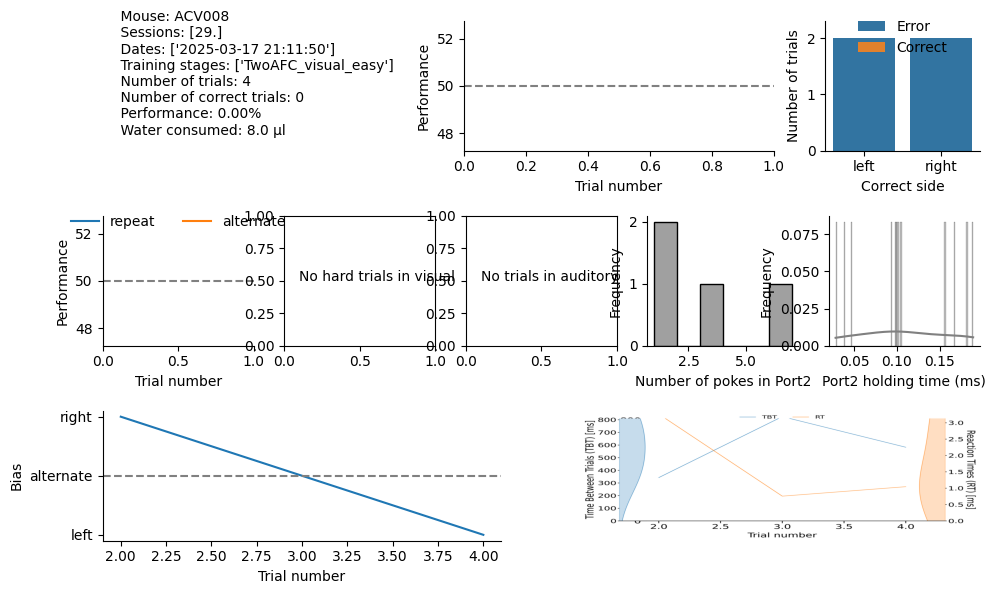

In [71]:
from lecilab_behavior_analysis.figure_maker import session_summary_figure

date = "2025-03-17 21:11:50"

print(gsbu_df[gsbu_df['date'] == date].to_string(index=False))

f = session_summary_figure(df2afc[df2afc.date == date])

In [72]:
# display all columns of the dataframe
pd.set_option('display.max_rows', 10)
df2afc[df2afc['date'] == date]

,session,date,trial,subject,task,system_name,run_mode,Port1In,Port1Out,Port2In,Port2Out,Port3In,Port3Out,STATE_auto_reward_state_left_END,STATE_auto_reward_state_left_START,STATE_hold_center_port_END,STATE_hold_center_port_START,STATE_hold_while_stimulus_END,STATE_hold_while_stimulus_START,STATE_iti_END,STATE_iti_START,STATE_punish_state_END,STATE_punish_state_START,STATE_ready_to_initiate_END,STATE_ready_to_initiate_START,STATE_reward_state_END,STATE_reward_state_START,STATE_reward_state_left_END,STATE_reward_state_left_START,STATE_reward_state_right_END,STATE_reward_state_right_START,STATE_start_of_trial_END,STATE_start_of_trial_START,STATE_stimulus_state_END,STATE_stimulus_state_START,TRIAL_END,TRIAL_START,Tup,auditory_real_statistics,auditory_stimulus,correct,correct_side,current_training_stage,difficulty,holding_time,ordered_list_of_events,stimulus_modality,stimulus_modality_block_number,visual_stimulus,water,trial_duration,engaged,day_session
460420,29.0,2025-03-17 21:11:50,1.0,ACV008,TwoAFC,village01,Auto,"[1742242317.650429, 1742242317.833329, 1742242...","[1742242317.665829, 1742242318.624929, 1742242...",[1742242455.165829],[1742242455.355129],"[1742242320.561929, 1742242320.795229, 1742242...","[1742242320.585329, 1742242322.424129, 1742242...",NaN,NaN,[1742242455.303829],[1742242455.165829],NaN,NaN,[1742242512.935929],[1742242511.935929],[nan],[nan],[1742242455.165829],[1742242310.503229],[1742242511.935929],[1742242511.931729],NaN,NaN,NaN,NaN,[1742242310.503229],[1742242310.502229],"[1742242456.168429, 1742242457.016829, 1742242...","[1742242455.303829, 1742242456.168429, 1742242...",1.742243e+09,1.742242e+09,"[1742242310.503229, 1742242455.303829, 1742242...",NaN,NaN,False,left,TwoAFC_visual_easy,easy,0.138,"['Tup', 'Port1In', 'Port1Out', 'Port1In', 'Por...",visual,NaN,"(0.5326611912303547, 0.10653223824607094)",2.0,202.4337,False,False
460421,29.0,2025-03-17 21:11:50,2.0,ACV008,TwoAFC,village01,Auto,[1742243077.191726],NaN,"[1742242515.7243261, 1742242797.8307261, 17422...","[1742242515.770926, 1742242797.868926, 1742242...",[1742242801.334726],[1742242802.551726],NaN,NaN,"[1742242515.770926, 1742242797.868926, 1742242...","[1742242515.7243261, 1742242797.8307261, 17422...",NaN,NaN,[1742243078.195926],[1742243077.195926],[nan],[nan],"[1742242515.7243261, 1742242797.8307261, 17422...","[1742242512.944026, 1742242515.770926, 1742242...",[1742243077.195926],[1742243077.191726],NaN,NaN,NaN,NaN,[1742242512.944026],[1742242512.943026],"[1742242801.334726, 1742243077.191726]","[1742242798.025226, 1742242801.334726]",1.742243e+09,1.742243e+09,"[1742242512.944026, 1742242798.025226, 1742243...",NaN,NaN,False,left,TwoAFC_visual_easy,easy,0.138,"['Tup', 'Port2In', 'Port2Out', 'Port2In', 'Por...",visual,NaN,"(0.6512952610514365, 0.1302590522102873)",2.0,565.2529,False,False
460422,29.0,2025-03-17 21:11:50,3.0,ACV008,TwoAFC,village01,Auto,"[1742243081.092924, 1742243393.571724, 1742243...","[1742243080.540924, 1742243081.353324, 1742243...","[1742243383.426224, 1742243383.489124, 1742243...","[1742243383.454324, 1742243383.586724, 1742243...","[1742243389.237324, 1742243450.461124, 1742243...","[1742243389.464124, 1742243450.4744241, 174224...",NaN,NaN,"[1742243383.454324, 1742243383.586724, 1742243...","[1742243383.426224, 1742243383.489124, 1742243...",NaN,NaN,[1742243751.573224],[1742243750.573224],[nan],[nan],"[1742243383.426224, 1742243383.489124, 1742243...","[1742243078.205524, 1742243383.454324, 1742243...",[1742243750.573224],[1742243750.5694242],NaN,NaN,NaN,NaN,[1742243078.205524],[1742243078.204524],"[1742243623.812424, 1742243735.8050241, 174224...","[1742243623.037724, 1742243623.812424, 1742243...",1.742244e+09,1.742243e+09,"[1742243078.205524, 1742243623.037724, 1742243...",NaN,NaN,False,right,TwoAFC_visual_easy,easy,0.138,"['Tup', 'Port1Out', 'Port1In', 'Port1Out', 'Po...",visual,NaN,"(0.7896106935735926, 0.15792213871471852)",2.0,673.3687,False,False
460423,29.0,2025-03-17 21:11:50,4.0,ACV008,TwoAFC,village0

In [70]:
sessions_summary_df[sessions_summary_df['date'] == date]

,date,subject,tag,weight,task,duration,trials,water,settings
98,2025-03-14 20:19:35,ACV004,1A9DBD90AE,23.123016,TwoAFC,1157.6926,11,38.0,"{""minimum_duration"": 1200.0, ""maximum_duration..."


After talking to Rafa there was an issue with how the sessions_summary duration data was saved.
I keep some of the above cells for now but this can be deleted at some point

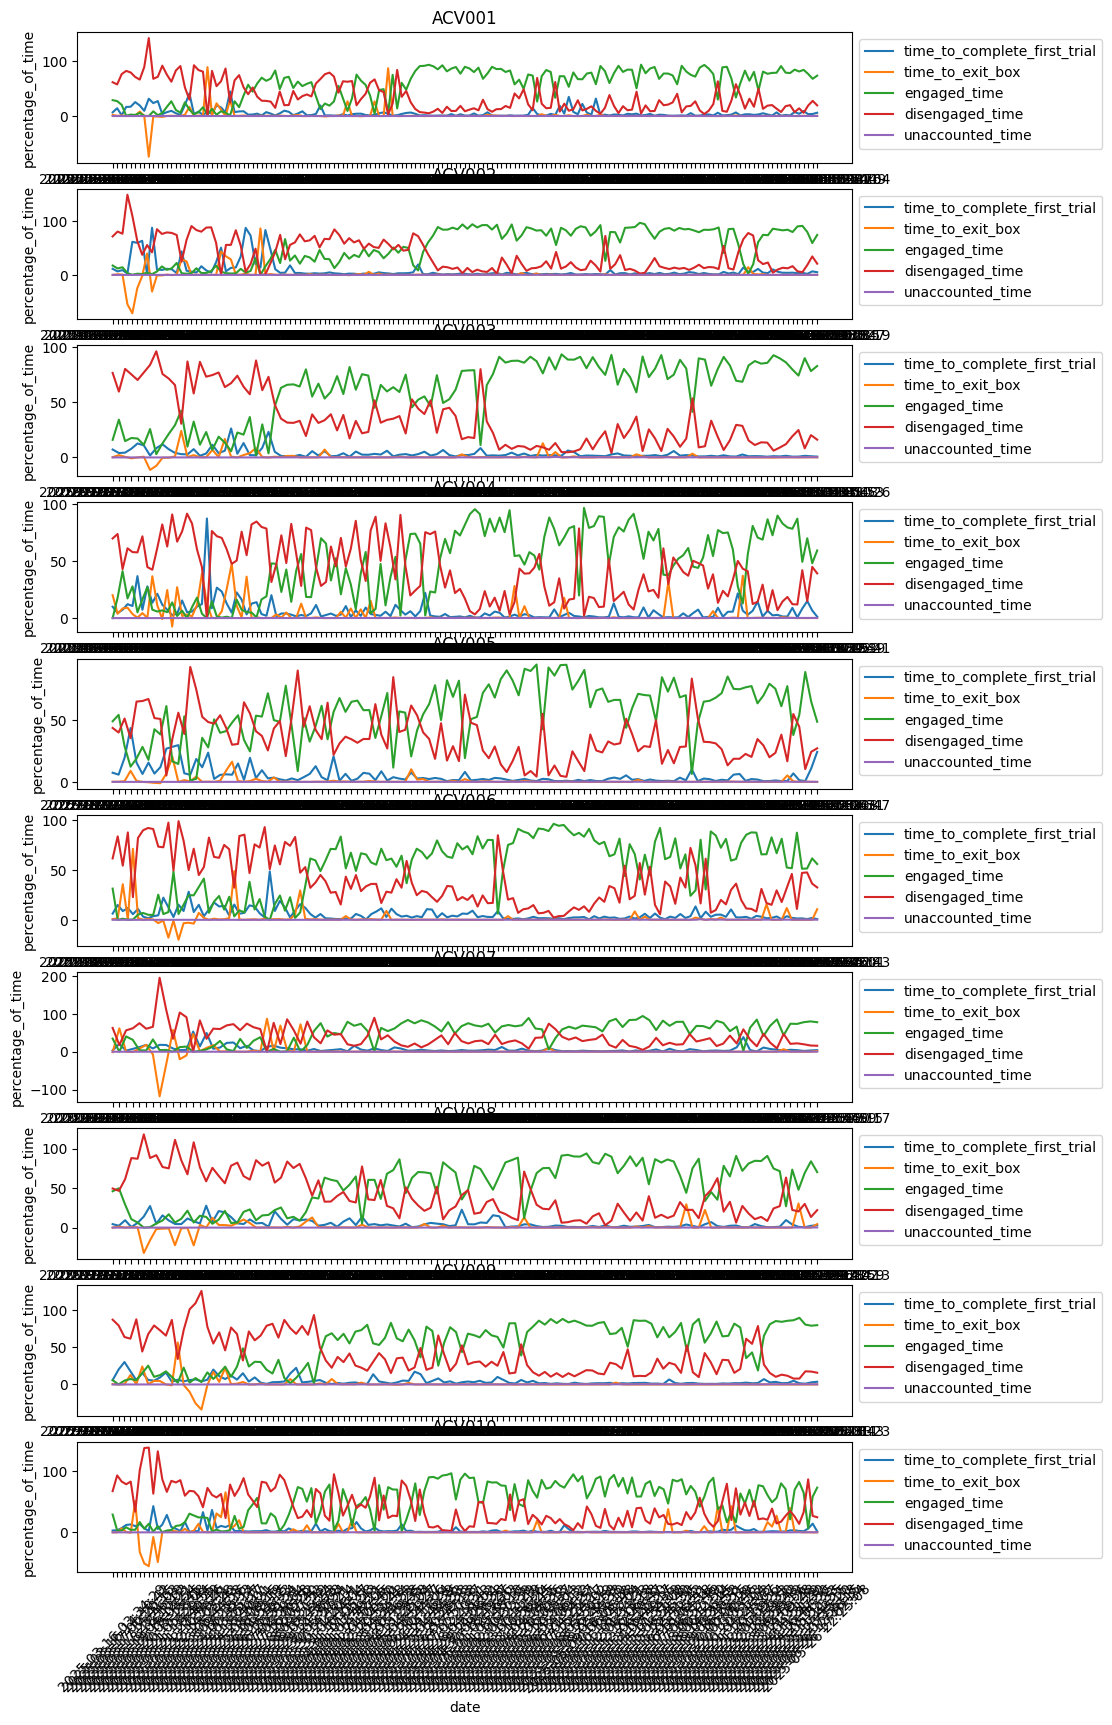

In [33]:
# plot this for each subject
fig, axs = plt.subplots(nrows=len(gsbu_df.subject.unique()), ncols=1, figsize=(10,20))
axs = axs.ravel()
for i, sel_sub in enumerate(gsbu_df.subject.unique()):
    gsbu_df_sel = gsbu_df[gsbu_df['subject'] == sel_sub]
    axs[i].set_title(sel_sub)
    sns.lineplot(data=gsbu_df_sel, x='date', y='percentage_of_time', hue='time_type', ax=axs[i])
    plt.xticks(rotation=45)
    # show legend on the right outside the plot
    axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

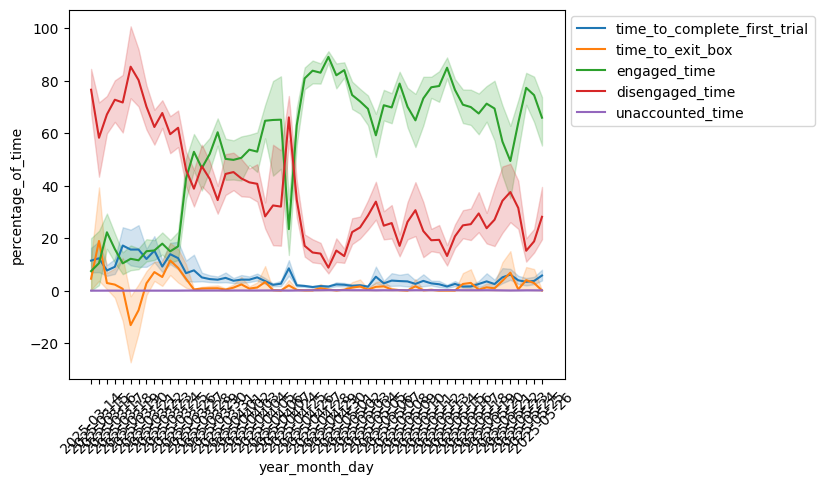

In [34]:
# show the mean
gsbu_df = dft.add_day_column_to_df(gsbu_df)
# sort by date
gsbu_df = gsbu_df.sort_values(by='year_month_day')
sns.lineplot(data=gsbu_df, x='year_month_day', y='percentage_of_time', hue='time_type', estimator='mean')
plt.xticks(rotation=45)
# legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

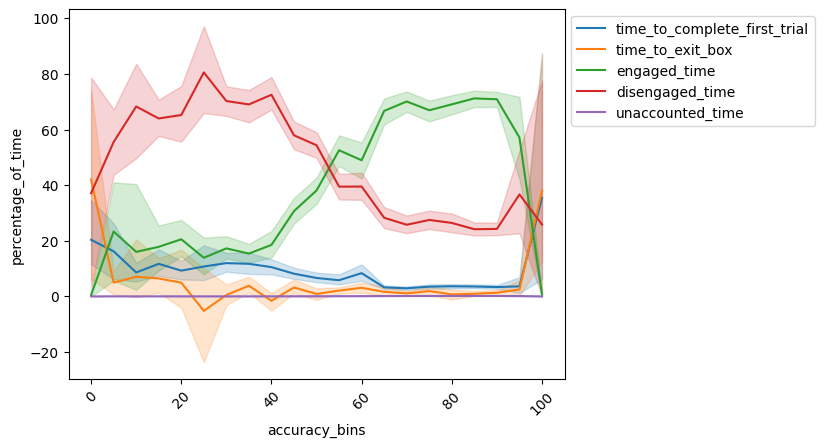

In [35]:
# same but match to accuracy
gsbu_df["accuracy_bins"] = gsbu_df["accuracy"] // 5 * 5
sns.lineplot(data=gsbu_df, x='accuracy_bins', y='percentage_of_time', hue='time_type', estimator='mean')
plt.xticks(rotation=45)
# legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [36]:
# look for differences between day and night sessions!!!
gsbu_df["is_day_session"] = gsbu_df["date"].apply(is_day_session)

In [141]:
gsbu_df.is_day_session.value_counts()

is_day_session
False    3690
True     2875
Name: count, dtype: int64

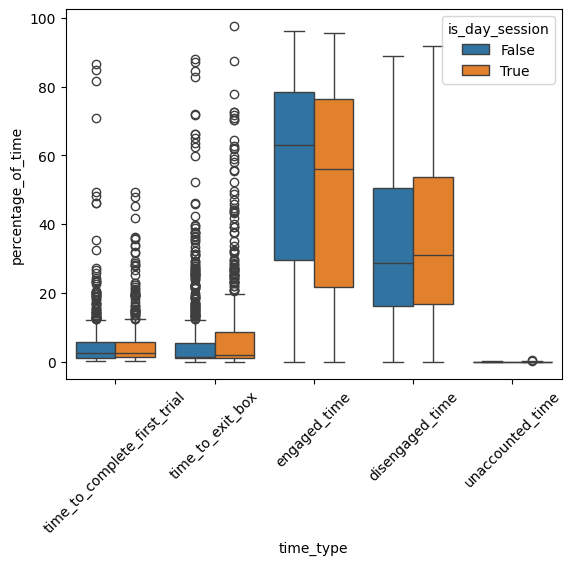

In [142]:
sns.boxplot(data=gsbu_df, x='time_type', y='percentage_of_time', hue='is_day_session')
plt.xticks(rotation=45)
plt.show()

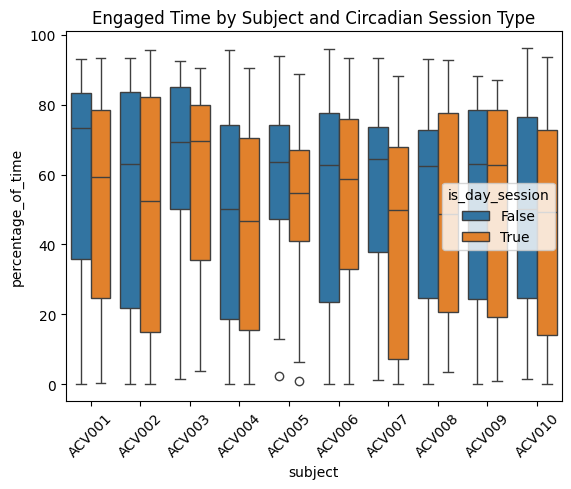

In [143]:
# compare the engaged time across day and night sessions per subject
# for engaged time only:
sns.boxplot(data=gsbu_df[gsbu_df['time_type'] == 'engaged_time'], x='subject', y='percentage_of_time', hue='is_day_session')
plt.xticks(rotation=45)
plt.title('Engaged Time by Subject and Circadian Session Type')
plt.show()

In [37]:
# show it as a mean per animal once the accuracy is high
gsbu_df_sel = gsbu_df[(65 < gsbu_df['accuracy']) & (gsbu_df['accuracy'] < 95)]
gsbu_df_sel_gb = gsbu_df_sel.groupby(['subject', 'is_day_session' , 'time_type'])["percentage_of_time"].mean().reset_index()

In [145]:
gsbu_df_sel_gb.time_type.unique()

array(['disengaged_time', 'engaged_time', 'time_to_complete_first_trial',
       'time_to_exit_box', 'unaccounted_time'], dtype=object)

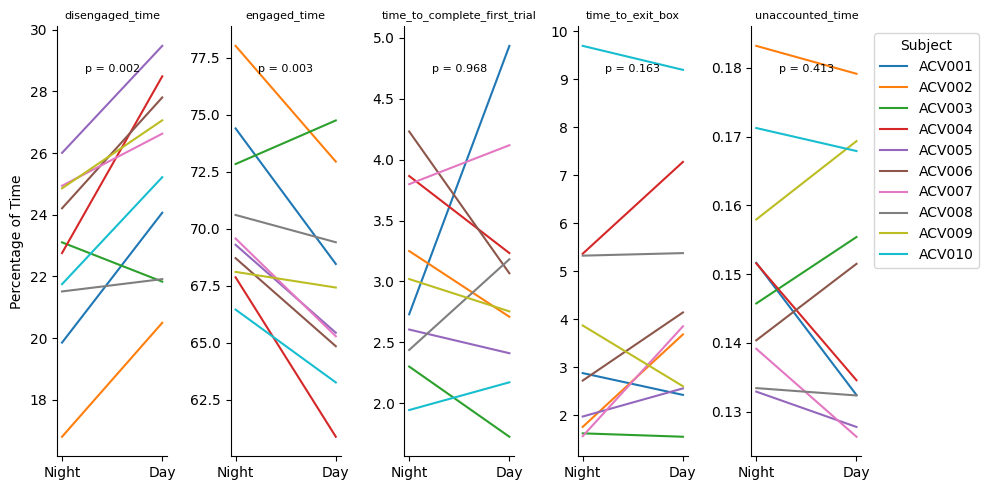

: 

In [ ]:
from scipy.stats import ttest_rel
fig, axs = plt.subplots(ncols=len(gsbu_df_sel_gb.time_type.unique()), nrows=1, figsize=(10,5))
axs = axs.ravel()
for i, time_type in enumerate(gsbu_df_sel_gb['time_type'].unique()):
    tt_df = gsbu_df_sel_gb[gsbu_df_sel_gb['time_type'] == time_type]
    sns.lineplot(data=tt_df, x="is_day_session", y="percentage_of_time", hue="subject", estimator=None, marker="", ax=axs[i])
    axs[i].set_title(time_type, fontsize=8)
    axs[i].set_xticks([0, 1], ["Night", "Day"])
    # remove legend
    axs[i].legend([],[], frameon=False)
    axs[i].set_ylabel("")
    axs[i].set_xlabel("")
    # add stats
    day_values = tt_df[tt_df["is_day_session"] == True]["percentage_of_time"].values
    night_values = tt_df[tt_df["is_day_session"] == False]["percentage_of_time"].values
    _, p_value = ttest_rel(night_values, day_values)
    axs[i].text(0.5, 0.9, f'p = {p_value:.3f}', transform=axs[i].transAxes, ha='center', va='center', fontsize=8)
    # despine
    sns.despine(ax=axs[i])  # add despine for better aesthetics
axs[0].set_ylabel("Percentage of Time")
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_engagement_circadian_differences.pdf', bbox_inches='tight', transparent=True)

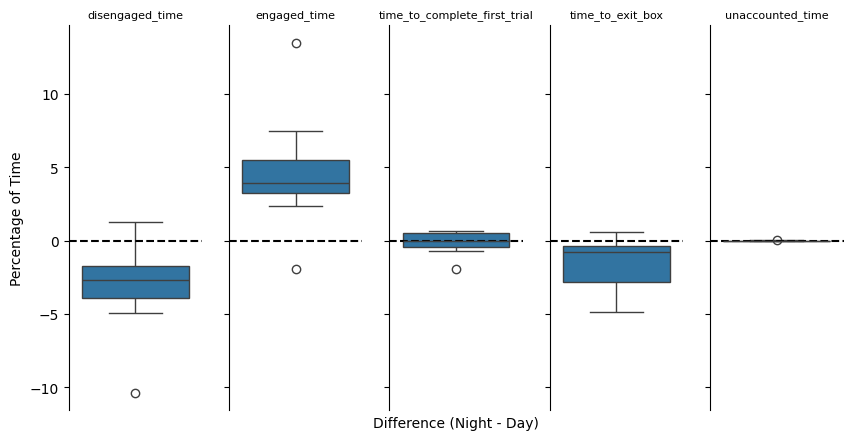

In [147]:
# plot it as the difference between day and night sessions
fig, axs = plt.subplots(ncols=len(gsbu_df_sel_gb.time_type.unique()), nrows=1, figsize=(10,5), sharey=True)
axs = axs.ravel()
for i, time_type in enumerate(gsbu_df_sel_gb['time_type'].unique()):
    tt_df = gsbu_df_sel_gb[gsbu_df_sel_gb['time_type'] == time_type]
    # get the difference between day and night sessions per mouse
    difs = []
    for subject in tt_df['subject'].unique():
        day_value = tt_df[(tt_df['is_day_session'] == True) & (tt_df['subject'] == subject)]['percentage_of_time'].values[0]
        night_value = tt_df[(tt_df['is_day_session'] == False) & (tt_df['subject'] == subject)]['percentage_of_time'].values[0]
        difs.append(- day_value + night_value)
    sns.boxplot(data=pd.DataFrame({'difference': difs}), y='difference', ax=axs[i])
    axs[i].set_title(time_type, fontsize=8)
    axs[i].set_ylabel("Percentage of Time")
    # despine
    sns.despine(ax=axs[i])  # add despine for better aesthetics
    axs[i].set_xticks([])  # remove x-ticks
    axs[i].set_xlabel("")  # remove x-label
    # remove x line
    axs[i].spines['bottom'].set_visible(False)
    # horizontal line at 0
    axs[i].axhline(0, color='black', linestyle='--')
axs[2].set_xlabel("Difference (Night - Day)")

plt.show()


In [47]:
gsbu_df_sel_gb

,subject,is_day_session,time_type,percentage_of_time
0,ACV001,False,disengaged_time,14.456826
1,ACV001,False,engaged_time,83.280553
2,ACV001,False,time_to_complete_first_trial,3.479796
3,ACV001,False,time_to_exit_box,-1.367582
4,ACV001,False,unaccounted_time,0.150406
...,...,...,...,...
95,ACV010,True,disengaged_time,18.170506
96,ACV010,True,engaged_time,74.440361
97,ACV010,True,time_to_complete_first_trial,2.631613
98,ACV010,True,time_to_exit_box,4.583866
